# Spam Detector

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Retrieve the Data

The data is located at [https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv](https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv)

Dataset Source: [UCI Machine Learning Library](https://archive.ics.uci.edu/dataset/94/spambase)

Import the data using Pandas. Display the resulting DataFrame to confirm the import was successful.

In [2]:
# Import the data
data = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv")
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
data.shape

(4601, 58)

## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

---

### Prediction of Model Performance

---

**Prediction**: The Random Forest Classifier will outperform Logistic Regression. **Random Forests** are expected to achieve better accuracy and robustness on this dataset.

#### Justification:
- **Feature Interaction**: Random Forests handle nonlinear relationships and interactions better.
- **Nonlinear Boundaries**: Logistic Regression assumes linear relationships, whereas Random Forests adapt to complex patterns.
- **Robustness**: Random Forests are less sensitive to noise and outliers.
- **Feature Importance**: Random Forests provide insights into feature contributions, unlike Logistic Regression.
- **Sparse Data Handling**: Tree-based methods like Random Forests manage sparsity effectively.
- **Spam Detection Trends**: Ensemble methods like Random Forests typically perform well in spam detection tasks.

---


## Split the Data into Training and Testing Sets

In [4]:
# Create the labels set `y` and features DataFrame `X`

# Create the labels set (y) from the 'spam' column
y = data['spam']

# Create the features DataFrame (X) from the remaining columns
X = data.drop(columns=['spam'])

In [5]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.


y.value_counts()

spam
0    2788
1    1813
Name: count, dtype: int64

In [6]:
# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Scale the Features

Use the `StandardScaler` to scale the features data. Remember that only `X_train` and `X_test` DataFrames should be scaled.

In [7]:
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler instance

scaler = StandardScaler()

In [8]:
# Fit the Standard Scaler with the training data

scaler.fit(X_train)

StandardScaler()

In [9]:
# Scale the training data

# Scale the training and testing features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Create and Fit a Logistic Regression Model

Create a Logistic Regression model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [10]:
# Train a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logistic_model = LogisticRegression(random_state=1)

In [11]:
# Make and save testing predictions with the saved logistic regression model using the test data
# Fit the model to the scaled training data
logistic_model.fit(X_train_scaled, y_train)


# Review the predictions
# Save the predictions on the testing data

testing_predictions = logistic_model.predict(X_test_scaled)
print("Predictions:", testing_predictions)


Predictions: [0 0 0 ... 1 1 0]


In [12]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.

log_r_accuracy = accuracy_score(y_test, testing_predictions)
print(f"Logistic Regression Model Accuracy: {log_r_accuracy:.4f}")

Logistic Regression Model Accuracy: 0.9225


## Create and Fit a Random Forest Classifier Model

Create a Random Forest Classifier model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [13]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=1)

In [14]:
# Make and save testing predictions with the saved logistic regression model using the test data


# Fit the model to the scaled training data
random_forest_model.fit(X_train_scaled, y_train)

# Save the predictions on the testing data
rf_testing_predictions = random_forest_model.predict(X_test_scaled)

# Review the predictions

print("Predictions:", rf_testing_predictions)


Predictions: [0 0 0 ... 1 1 0]


In [15]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.

rf_accuracy = accuracy_score(y_test, rf_testing_predictions)
print(f"Random Forest Classifier Model Accuracy: {rf_accuracy:.4f}")

Random Forest Classifier Model Accuracy: 0.9558


In [16]:
# Print both accuracy scores for comparison
print(f"Logistic Regression Accuracy: {log_r_accuracy:.4f}")
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.4f}")

# Compare the two models
if rf_accuracy > log_r_accuracy:
    print("The Random Forest Classifier performed better.")
elif rf_accuracy < log_r_accuracy:
    print("The Logistic Regression model performed better.")
else:
    print("Both models have the same accuracy.")


Logistic Regression Accuracy: 0.9225
Random Forest Classifier Accuracy: 0.9558
The Random Forest Classifier performed better.


## Evaluate the Models

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the following markdown cell.

### Model Evaluation

**Results**:
- Logistic Regression Accuracy: 0.9225
- Random Forest Classifier Accuracy: 0.9558

**Which Model Performed Better?**  
The Random Forest Classifier performed better than the Logistic Regression model, achieving a higher accuracy score on the testing dataset.

**Comparison to Prediction**:  
This result aligns with my initial prediction. I anticipated that the Random Forest Classifier would outperform Logistic Regression due to its ability to capture nonlinear relationships, handle feature interactions, and provide robustness to noise and outliers. The results validate these strengths, as the Random Forest Classifier achieved better performance on this spam classification task.

**Conclusion**:  
The Random Forest Classifier is a more suitable model for this dataset, and it should be considered for similar tasks involving spam detection or other datasets with complex feature relationships.

---

# Bonus Section: Evaluating Precision and Recall

As an additional analysis, precision and recall metrics were calculated for both models to provide a more nuanced evaluation of their performance. This bonus section highlights how well the models balance the trade-offs between minimizing false positives (precision) and false negatives (recall).

---

In [17]:
# Import metrics for precision and recall
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression Model
log_r_model = LogisticRegression(random_state=1)
log_r_model.fit(X_train_scaled, y_train)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train_scaled, y_train)


# Ensure predictions are saved for Logistic Regression
log_r_predictions = log_r_model.predict(X_test_scaled)

# Ensure predictions are saved for Random Forest
rf_predictions = rf_model.predict(X_test_scaled)


# Calculate precision and recall for Logistic Regression
log_r_precision = precision_score(y_test, log_r_predictions)
log_r_recall = recall_score(y_test, log_r_predictions)

# Calculate precision and recall for Random Forest
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)

# Display the precision and recall for both models
print("Logistic Regression Metrics:")
print(f"Precision: {log_r_precision:.2f}")
print(f"Recall: {log_r_recall:.2f}\n")

print("Random Forest Metrics:")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")

Logistic Regression Metrics:
Precision: 0.93
Recall: 0.88

Random Forest Metrics:
Precision: 0.96
Recall: 0.93


# Final Assessment

Both models perform well, but the **Random Forest model** is slightly better for this dataset due to its superior precision and recall. It would likely be the preferred choice unless simplicity or training speed is a major concern, where Logistic Regression could be considered.

---

## Precision
**Definition**: Precision measures how many of the emails predicted as spam by the model are actually spam.

- **Logistic Regression (Precision: 0.93)**:
  - Out of all the emails classified as spam by the Logistic Regression model, 93% are truly spam.
- **Random Forest (Precision: 0.96)**:
  - Out of all the emails classified as spam by the Random Forest model, 96% are truly spam.

**Interpretation**: A high precision indicates that the model is good at minimizing false positives (legitimate emails mistakenly marked as spam).

---

## Recall
**Definition**: Recall measures how many of the actual spam emails were correctly identified by the model.

- **Logistic Regression (Recall: 0.88)**:
  - Out of all the actual spam emails, the Logistic Regression model correctly identified 88%.
- **Random Forest (Recall: 0.93)**:
  - Out of all the actual spam emails, the Random Forest model correctly identified 93%.

**Interpretation**: A high recall means the model is good at minimizing false negatives (spam emails that were missed).

---

## Comparison of the Models
### Random Forest Outperforms Logistic Regression:
- The Random Forest model has slightly better **precision** (0.96 vs. 0.93) and **recall** (0.93 vs. 0.88).
- This indicates it is more effective at both identifying spam emails and avoiding misclassifying legitimate emails as spam.

### Trade-offs:
- Logistic Regression is slightly worse at recall, meaning it misses more spam emails compared to Random Forest.
- However, both models perform well overall, with scores above 85% for both precision and recall.

---

# Visualizations of Data and Model Performance

### Feature Importance (Random Forest)

Display the importance of each feature as determined by the Random Forest model using a bar plot. This visualization helps explain which features contribute the most to the model's decision-making.

/var/folders/gg/vmh0mv_j5b90pkytkpd35k940000gn/T/ipykernel_2266/335982695.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


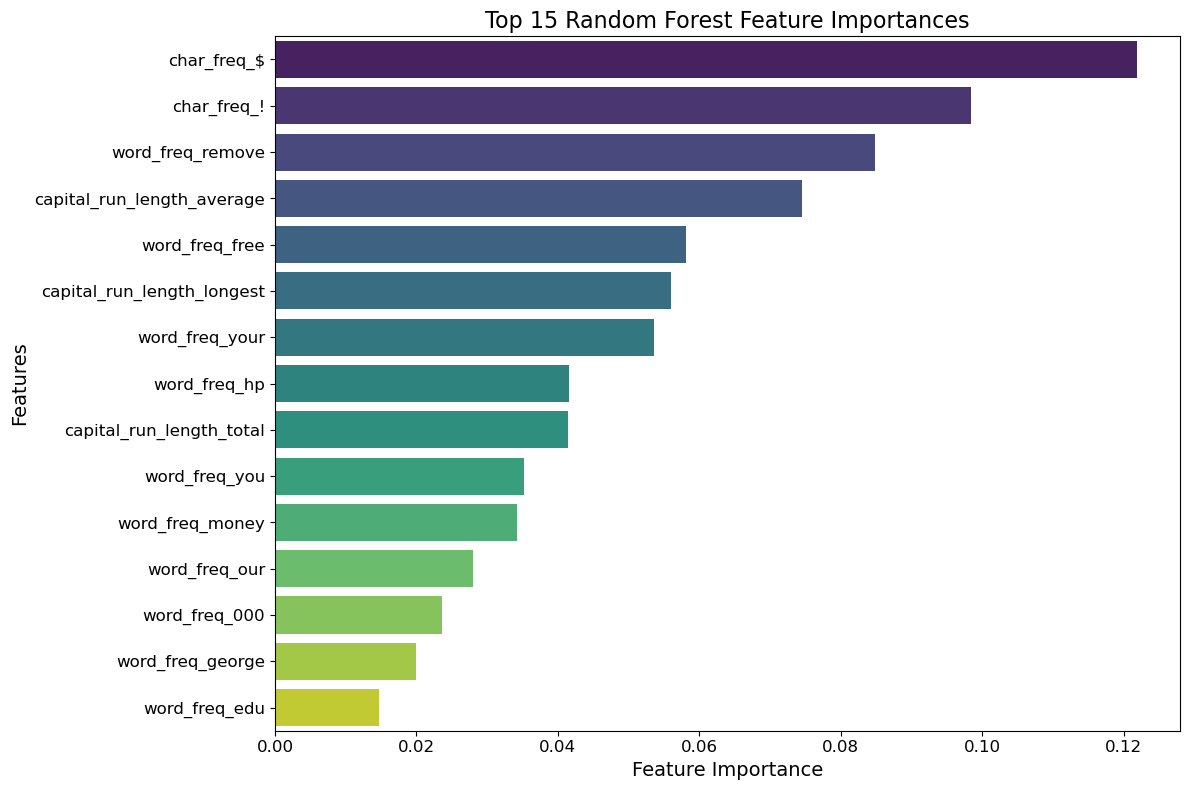

In [18]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the fitted Random Forest model
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features by importance and select the top 15
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(15)

# Plot the top 15 feature importances using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_features,
    x='Importance',
    y='Feature',
    palette='viridis'
)
plt.xlabel("Feature Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Top 15 Random Forest Feature Importances", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


### Model Accuracy Comparison

To visually compare the performance of Logistic Regression and Random Forest models, a bar plot is used to display their respective accuracy scores. This visualization helps highlight the difference in accuracy between the two models.

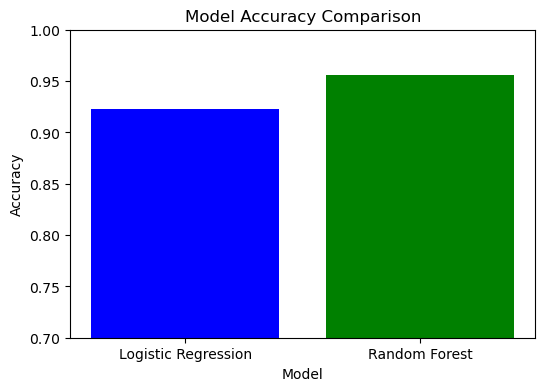

In [19]:
model_names = ['Logistic Regression', 'Random Forest']
accuracy_scores = [log_r_accuracy, rf_accuracy]
plt.figure(figsize=(6, 4))
plt.bar(model_names, accuracy_scores, color=['blue', 'green'])
plt.ylim(0.7, 1.0)  # Focus on the range near 100% for detail
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()